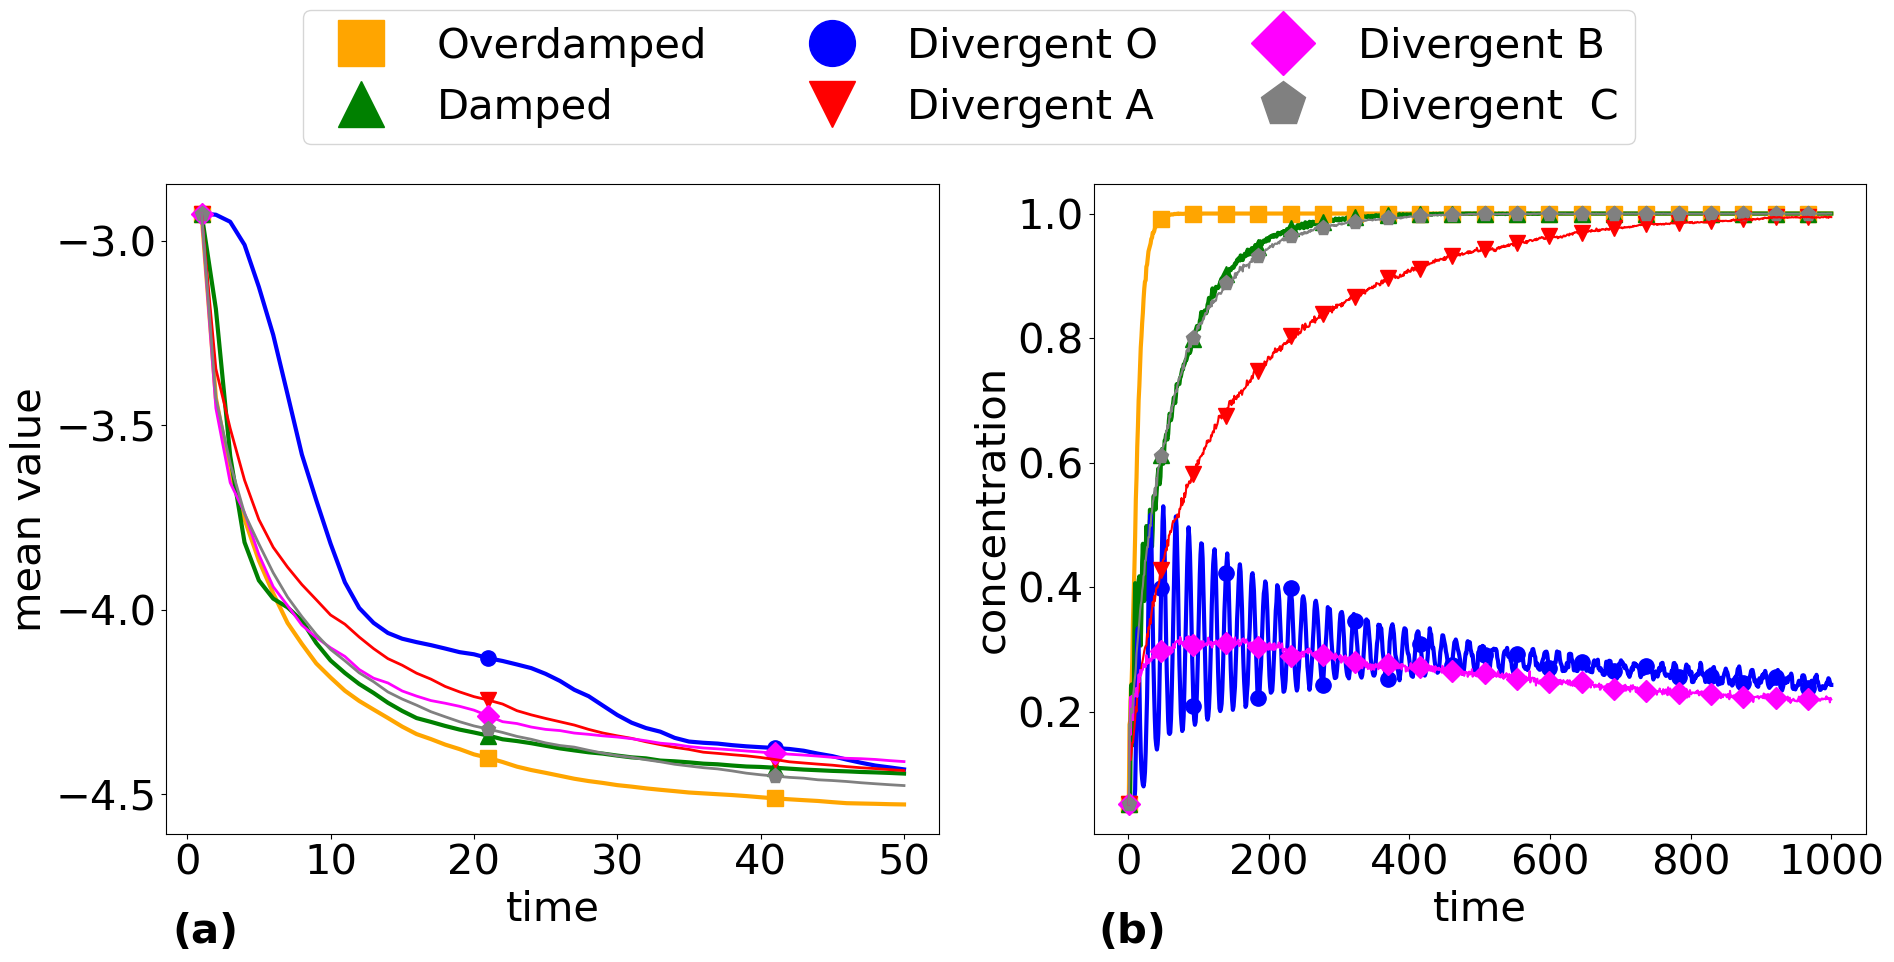

In [81]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 15 14:41:50 2024

@author: mkost
"""

import numpy as np
import matplotlib.pyplot as plt
from Variables import *
from Functions import *

MeanA=np.load('./Results/Mean'+str(nameA)+'.npy')
MeanB=np.load('./Results/Mean'+str(nameB)+'.npy')
MeanC=np.load('./Results/Mean'+str(nameC)+'.npy')

#%%
ConcentrationA=np.load('./Results/AverageConcentration'+str(nameA)+'.npy')
ConcentrationB=np.load('./Results/AverageConcentration'+str(nameB)+'.npy')
ConcentrationC=np.load('./Results/AverageConcentration'+str(nameC)+'.npy')


MeanDivergent=np.load('./Results/Mean'+str(nameDivergent)+'.npy')
MeanOverdamped=np.load('./Results/Mean'+str(nameOverdamped)+'.npy')
MeanDamped=np.load('./Results/Mean'+str(nameDamped)+'.npy')

ConcentrationDivergent=np.load('./Results/AverageConcentration'+str(nameDivergent)+'.npy')
ConcentrationOverdamped=np.load('./Results/AverageConcentration'+str(nameOverdamped)+'.npy')
ConcentrationDamped=np.load('./Results/AverageConcentration'+str(nameDamped)+'.npy')

#%%
# Calculate the average exploration and the commulative exploration of last time step 
#Eps=np.arange(0,1+0.1,0.1) # radi of average exploration
#Eps=np.arange(0.05,0.4,0.05)
Eps=np.arange(0.05,0.4,0.025)
AverageExplorationA=np.zeros(14) # average exploration at last timestep for Divergent
AverageExplorationB=np.zeros(14) # average exploration at last timestep for Overdamped
AverageExplorationC=np.zeros(14) # average exploration at last timestep for damped

AverageExplorationDivergent=np.zeros(14) # average exploration at last timestep for Divergent
AverageExplorationOverdamped=np.zeros(14) # average exploration at last timestep for Overdamped
AverageExplorationDamped=np.zeros(14) # average exploration at last timestep for damped


for i in range(10):
       
    ExplorationA=np.load('./Results/AverageScore'+str(nameA)+str(Eps[i])+'.npy')
    ExplorationB=np.load('./Results/AverageScore'+str(nameB)+str(Eps[i])+'.npy')
    ExplorationC=np.load('./Results/AverageScore'+str(nameC)+str(Eps[i])+'.npy')

    AverageExplorationA[i]=ExplorationA[-1]
    AverageExplorationB[i]=ExplorationB[-1]
    AverageExplorationC[i]=ExplorationC[-1]
    
    
    ExplorationDivergent=np.load('./Results/AverageScore'+str(nameDivergent)+str(Eps[i])+'.npy')
    ExplorationOverdamped=np.load('./Results/AverageScore'+str(nameOverdamped)+str(Eps[i])+'.npy')
    ExplorationDamped=np.load('./Results/AverageScore'+str(nameDamped)+str(Eps[i])+'.npy')

    AverageExplorationDivergent[i]=ExplorationDivergent[-1]
    AverageExplorationOverdamped[i]=ExplorationOverdamped[-1]
    AverageExplorationDamped[i]=ExplorationDamped[-1]


#%%

eps=0.3
SimulationsNumber=[20,50, 100, 200] # should fit to the numbers in Exploration5D.py
T_PSO_s=2000

SimDivergent=np.zeros(4) # commulative exploration of Divergent at last timestep
SimOverdamped=np.zeros(4) # commulative exploration of Overdamped at last timestep
SimDamped=np.zeros(4) # commulative exploration of Damped at last timestep

SimA=np.zeros(4) # commulative exploration of Divergent at last timestep
SimB=np.zeros(4) # commulative exploration of Overdamped at last timestep
SimC=np.zeros(4) # commulative exploration of Damped at last timestep

for s in range(4):
    
    # Load the commulative exploration 
    ExplorationSimA=np.load('./Results/SimScores'+str(nameA)+str(SimulationsNumber[s])+'.npy')
    ExplorationSimB=np.load('./Results/SimScores'+str(nameB)+str(SimulationsNumber[s])+'.npy')
    ExplorationSimC=np.load('./Results/SimScores'+str(nameC)+str(SimulationsNumber[s])+'.npy')
    
    # Calculate the commulative exploration at last timestep
    SimA[s]=ExplorationSimA[-1]
    SimB[s]=ExplorationSimB[-1]
    SimC[s]=ExplorationSimC[-1]
    
    # Load the commulative exploration 
    ExplorationDivergentSim=np.load('./Results/SimScores'+str(nameDivergent)+str(SimulationsNumber[s])+'.npy')
    ExplorationOverdampedSim=np.load('./Results/SimScores'+str(nameOverdamped)+str(SimulationsNumber[s])+'.npy')
    ExplorationDampedSim=np.load('./Results/SimScores'+str(nameDamped)+str(SimulationsNumber[s])+'.npy')
    
    # Calculate the commulative exploration at last timestep
    SimDivergent[s]=ExplorationDivergentSim[-1]
    SimOverdamped[s]=ExplorationOverdampedSim[-1]
    SimDamped[s]=ExplorationDampedSim[-1]

#%%
Random=np.load('./Results/Random.npy')



#%% Paper Plot


legend_fontsize=30
T_PSO_s=50 # time for plotting of Mean
T_PSO_s2=1000 # time for plotting of Concentration
fig, axs = plt.subplots(1, 2, figsize=(20,10))
plt.subplots_adjust(top=0.8, bottom=0.15,left=0.1, right=0.95)

axs[0].plot(np.linspace(1, T_PSO_s, T_PSO_s), MeanOverdamped[0:T_PSO_s], linewidth=3.0,color='orange')
axs[0].plot(np.linspace(1, T_PSO_s, T_PSO_s), MeanDivergent[0:T_PSO_s],  linewidth=3.0,color='blue')
axs[0].plot(np.linspace(1, T_PSO_s, T_PSO_s), MeanDamped[0:T_PSO_s], linewidth=3.0,color='green')
axs[0].plot(np.linspace(1, T_PSO_s, T_PSO_s), MeanOverdamped[0:T_PSO_s],'s',markersize=11,markevery=20, color='orange',label='Overdamped')
axs[0].plot( np.linspace(1, T_PSO_s, T_PSO_s), MeanDamped[0:T_PSO_s],'^', markersize=11,markevery=20,color='green',label='Damped')
axs[0].plot(np.linspace(1, T_PSO_s, T_PSO_s), MeanDivergent[0:T_PSO_s],'o' ,markersize=11, markevery=20,color='blue',  label='Divergent O')
 
axs[0].plot(np.linspace(1, T_PSO_s, T_PSO_s), MeanA[0:T_PSO_s],'v',markersize=11,markevery=20, color='red',label='Divergent'+' '+str(Names[0]))
axs[0].plot( np.linspace(1, T_PSO_s, T_PSO_s), MeanB[0:T_PSO_s],'D', markersize=11,markevery=20,color='magenta',label='Divergent'+' '+str(Names[1]))
axs[0].plot(np.linspace(1, T_PSO_s, T_PSO_s), MeanC[0:T_PSO_s],'p' ,markersize=11, markevery=20,color='grey',  label='Divergent '+' '+str(Names[2]))
axs[0].plot(np.linspace(1, T_PSO_s, T_PSO_s), MeanA[0:T_PSO_s], linewidth=2.0,color='red')
axs[0].plot(np.linspace(1, T_PSO_s, T_PSO_s), MeanB[0:T_PSO_s],  linewidth=2.0,color='magenta')
axs[0].plot(np.linspace(1, T_PSO_s, T_PSO_s), MeanC[0:T_PSO_s], linewidth=2.0,color='grey')


axs[0].tick_params(axis='x', labelsize=30)
axs[0].tick_params(axis='y', labelsize=30)
axs[0].set_xlabel('time',  fontsize=30)
axs[0].set_ylabel('mean value',fontsize=30)
#axs[0].set_title('Mean Function Value',fontsize=30)

axs[1].plot(np.linspace(1, T_PSO_s2, T_PSO_s2), ConcentrationOverdamped[0:T_PSO_s2], linewidth=3,color='orange')
axs[1].plot(np.linspace(1, T_PSO_s2, T_PSO_s2), ConcentrationDamped[0:T_PSO_s2],linewidth=3.0,color='green')
axs[1].plot(np.linspace(1, T_PSO_s2, T_PSO_s2),ConcentrationDivergent[0:T_PSO_s2], linewidth=3.0,color='blue')
axs[1].plot(np.linspace(1, T_PSO_s2, T_PSO_s2), ConcentrationOverdamped[0:T_PSO_s2],'s',markersize=11,markevery=46,color='orange')
axs[1].plot(np.linspace(1, T_PSO_s2, T_PSO_s2), ConcentrationDamped[0:T_PSO_s2],'^',markersize=11,markevery=46,color='green')
axs[1].plot(np.linspace(1, T_PSO_s2, T_PSO_s2),ConcentrationDivergent[0:T_PSO_s2],'o',markersize=11,markevery=46,color='blue')

axs[1].plot(np.linspace(1, T_PSO_s2, T_PSO_s2), ConcentrationA[0:T_PSO_s2],'v',markersize=11,markevery=46,color='red')
axs[1].plot(np.linspace(1, T_PSO_s2, T_PSO_s2), ConcentrationB[0:T_PSO_s2],'D',markersize=11,markevery=46,color='magenta')
axs[1].plot(np.linspace(1, T_PSO_s2, T_PSO_s2),ConcentrationC[0:T_PSO_s2],'p',markersize=11,markevery=46,color='grey')
axs[1].plot(np.linspace(1, T_PSO_s2, T_PSO_s2), ConcentrationA[0:T_PSO_s2],color='red')
axs[1].plot(np.linspace(1, T_PSO_s2, T_PSO_s2), ConcentrationB[0:T_PSO_s2],color='magenta')
axs[1].plot(np.linspace(1, T_PSO_s2, T_PSO_s2),ConcentrationC[0:T_PSO_s2],color='grey')

axs[1].tick_params(axis='x', labelsize=30)
axs[1].tick_params(axis='y', labelsize=30)
axs[1].set_xlabel('time', fontsize=30)
#axs[1].set_title('Exploitation',fontsize=30)
axs[1].set_ylabel('concentration', fontsize=30)
axs[0].legend(bbox_to_anchor=(0.15, 1, 1, 0.3), loc="upper left",
               ncol=3,  prop={'size': legend_fontsize}, markerscale=3)
axs[0].text(0.05, -0.12, '(a)', transform=axs[0].transAxes, fontsize=30, va='top', ha='center',  fontweight='bold')
axs[1].text(0.05, -0.12, '(b)', transform=axs[1].transAxes, fontsize=30, va='top', ha='center', fontweight='bold')
plt.savefig('./Plots/Fig9.png')


#%% 


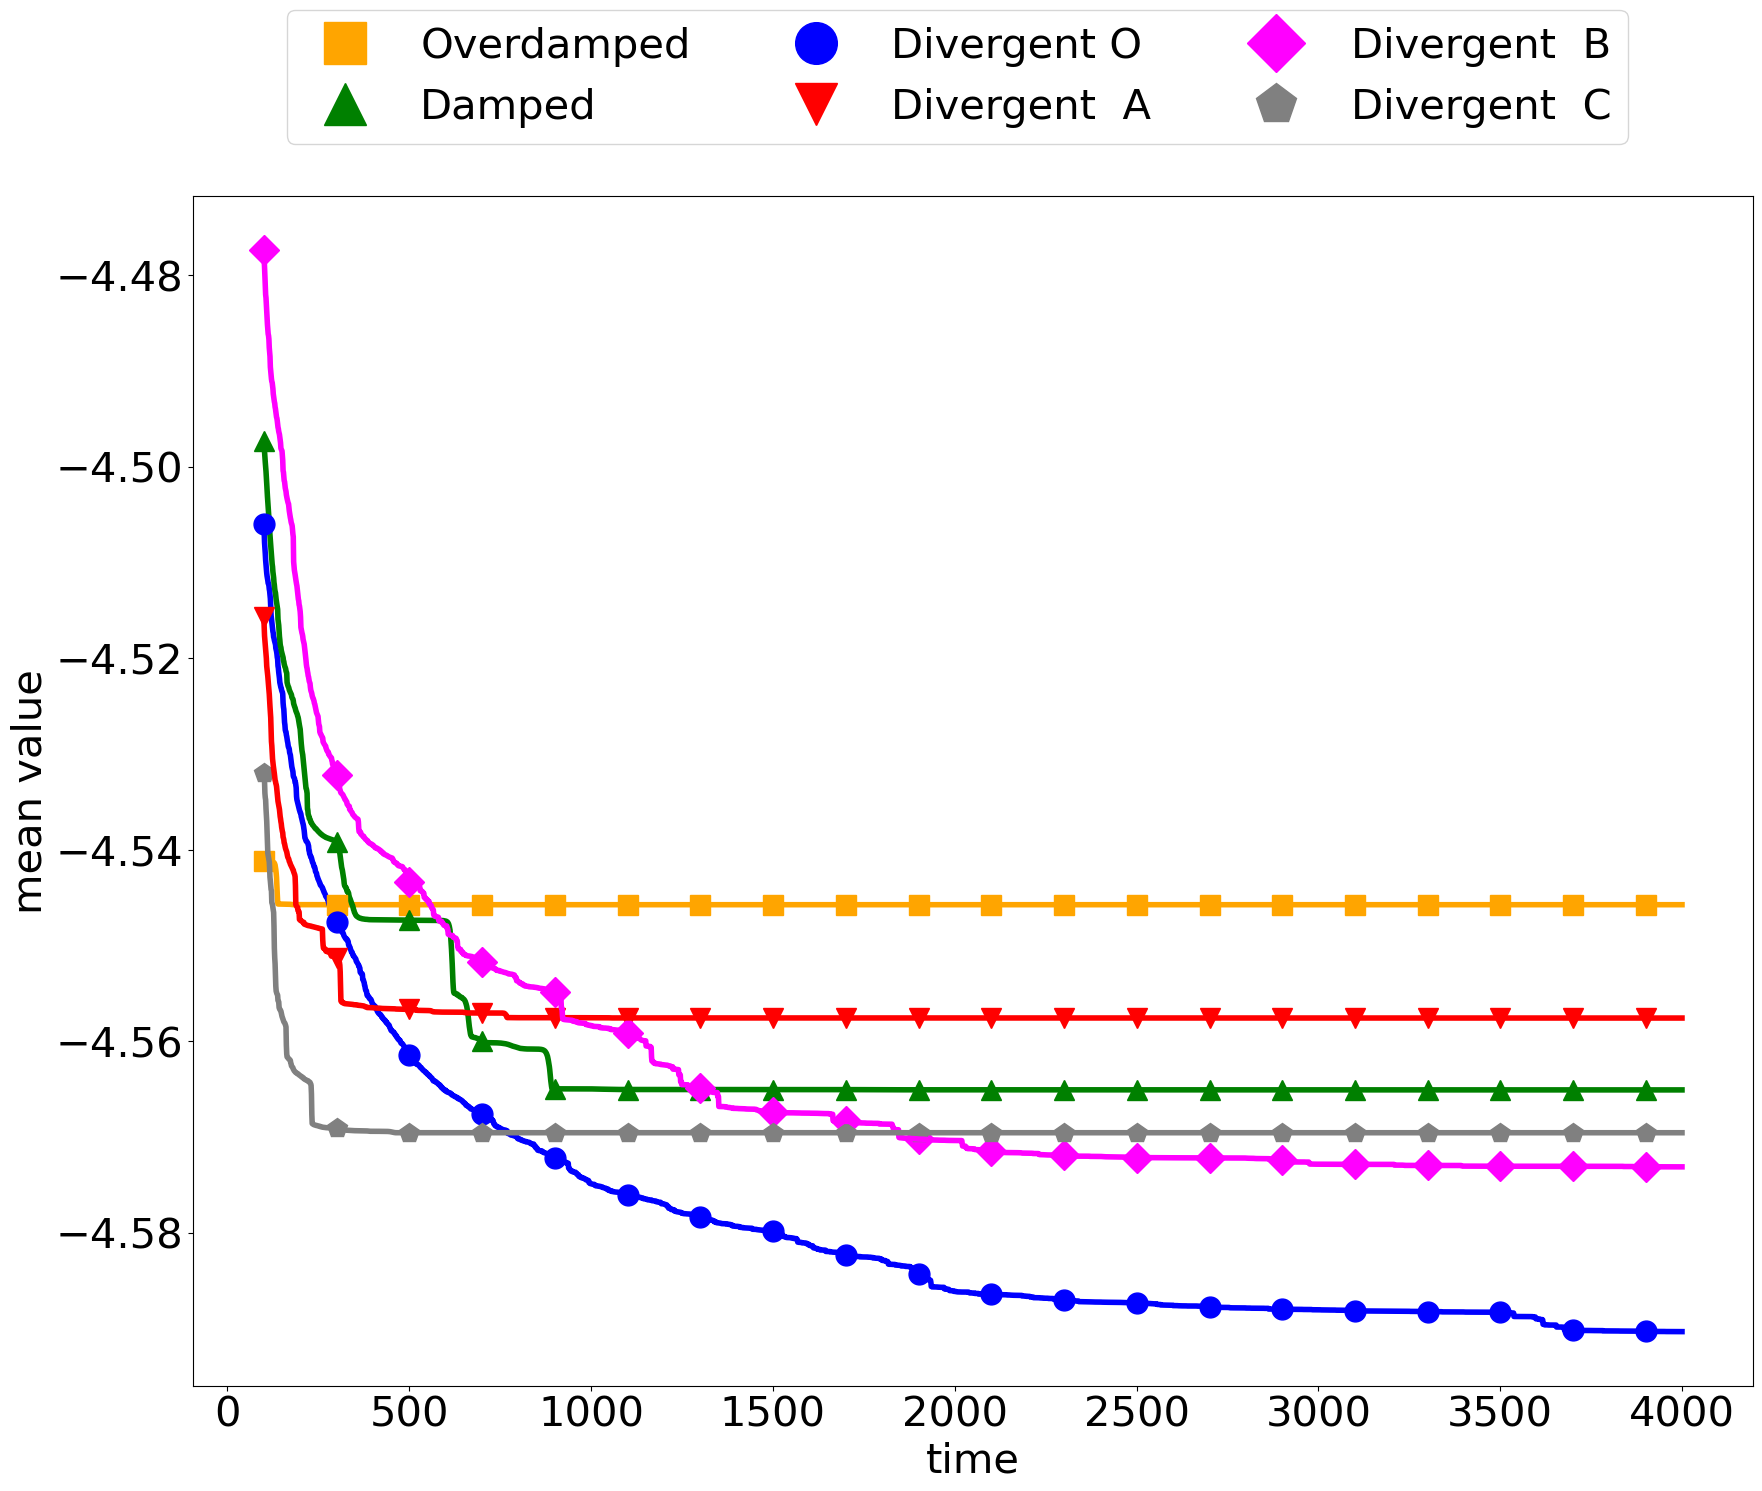

In [79]:



T_PSO_s = 4000  # time for plotting of Mean
start = 100
T_PSO_s2 = 1000  # time for plotting of Concentration

fig, axs = plt.subplots(1, 1, figsize=(20, 17))
plt.subplots_adjust(top=0.8, bottom=0.1, left=0.1, right=0.88)

axs.plot(np.linspace(start, T_PSO_s, T_PSO_s - start), MeanOverdamped[start:T_PSO_s], linewidth=4.0, color='orange')
axs.plot(np.linspace(start, T_PSO_s, T_PSO_s - start), MeanDivergent[start:T_PSO_s], linewidth=4.0, color='blue')
axs.plot(np.linspace(start, T_PSO_s, T_PSO_s - start), MeanDamped[start:T_PSO_s], linewidth=4.0, color='green')
axs.plot(np.linspace(start, T_PSO_s, T_PSO_s - start), MeanOverdamped[start:T_PSO_s], 's', markersize=15, markevery=200,
         color='orange', label='Overdamped')
axs.plot(np.linspace(start, T_PSO_s, T_PSO_s - start), MeanDamped[start:T_PSO_s], '^', markersize=15, markevery=200,
         color='green', label='Damped')
axs.plot(np.linspace(start, T_PSO_s, T_PSO_s - start), MeanDivergent[start:T_PSO_s], 'o', markersize=15, markevery=200,
         color='blue', label='Divergent O')

axs.plot(np.linspace(start, T_PSO_s, T_PSO_s - start), MeanA[start:T_PSO_s], 'v', markersize=15, markevery=200,
         color='red', label='Divergent ' + ' ' + str(Names[0]))
axs.plot(np.linspace(start, T_PSO_s, T_PSO_s - start), MeanB[start:T_PSO_s], 'D', markersize=15, markevery=200,
         color='magenta', label='Divergent ' + ' ' + str(Names[1]))
axs.plot(np.linspace(start, T_PSO_s, T_PSO_s - start), MeanC[start:T_PSO_s], 'p', markersize=15, markevery=200,
         color='grey', label='Divergent ' + ' ' + str(Names[2]))
axs.plot(np.linspace(start, T_PSO_s, T_PSO_s - start), MeanA[start:T_PSO_s], linewidth=4.0, color='red')
axs.plot(np.linspace(start, T_PSO_s, T_PSO_s - start), MeanB[start:T_PSO_s], linewidth=4.0, color='magenta')
axs.plot(np.linspace(start, T_PSO_s, T_PSO_s - start), MeanC[start:T_PSO_s], linewidth=4.0, color='grey')

axs.tick_params(axis='x', labelsize=30)
axs.tick_params(axis='y', labelsize=30)
axs.set_xlabel('time', fontsize=30)
axs.set_ylabel('mean value', fontsize=30)
#axs.set_title('Mean Function Value', fontsize=30)

axs.legend(bbox_to_anchor=(-0.06, 1.1, 1.1, 0), loc="center",
               ncol=3,  prop={'size': 30}, markerscale=2)

plt.savefig('./Plots/Fig14.png')

#%%

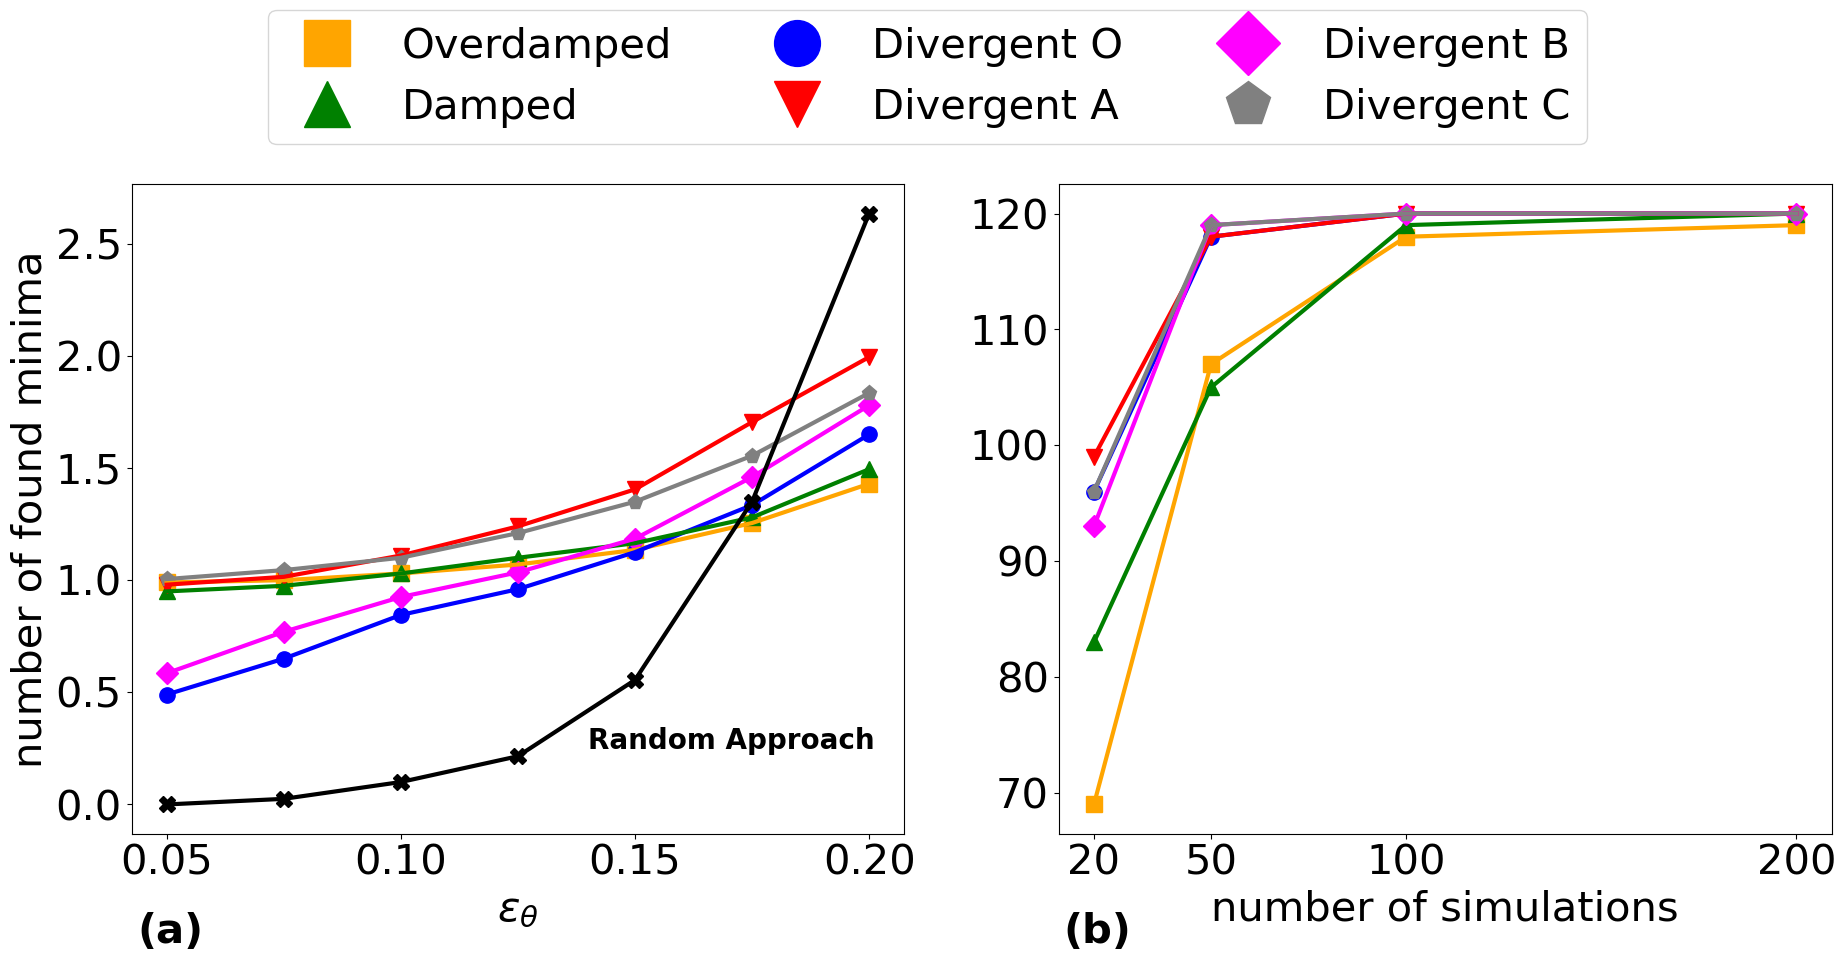

In [82]:
TI=7

fig, axs = plt.subplots(1, 2, figsize=(20,10))
plt.subplots_adjust(top=0.8, bottom=0.15,left=0.1, right=0.95)

axs[0].plot(Eps[0:TI], AverageExplorationOverdamped[0:TI], 's', markersize=11, color='orange', label='Overdamped')
axs[0].plot(Eps[0:TI], AverageExplorationDamped[0:TI], '^', markersize=11, color='green', label='Damped')
axs[0].plot(Eps[0:TI], AverageExplorationDivergent[0:TI], 'o', markersize=11, color='blue', label='Divergent O')

axs[0].plot(Eps[0:TI], AverageExplorationA[0:TI], 'v', markersize=11, color='red', label='Divergent' + ' ' + str(Names[0]))
axs[0].plot(Eps[0:TI], AverageExplorationB[0:TI], 'D', markersize=11, color='magenta', label='Divergent' + ' ' + str(Names[1]))
axs[0].plot(Eps[0:TI], AverageExplorationC[0:TI], 'p', markersize=11, color='grey', label='Divergent' + ' ' + str(Names[2]))

axs[0].plot(Eps[0:TI], AverageExplorationOverdamped[0:TI], linewidth=3,color='orange')
axs[0].plot(Eps[0:TI], AverageExplorationDivergent[0:TI], linewidth=3,color='blue')
axs[0].plot(Eps[0:TI], AverageExplorationDamped[0:TI], linewidth=3,color='green')

axs[0].plot(Eps[0:TI], AverageExplorationA[0:TI],linewidth=3, color='red')
axs[0].plot(Eps[0:TI], AverageExplorationB[0:TI],linewidth=3, color='magenta')
axs[0].plot(Eps[0:TI], AverageExplorationC[0:TI], linewidth=3,color='grey')

#axs[0].text(1, 70, 'Random Search', fontsize=25, va='center', ha='left')
axs[0].tick_params(axis='x', labelsize=30)
axs[0].tick_params(axis='y', labelsize=30)
axs[0].plot(Eps[0:TI], Random[0:TI],linewidth=3, color='black')
axs[0].plot(Eps[0:TI], Random[0:TI], 'X',markersize=11, markevery=1, color='black')
axs[0].set_xlabel(r'$\epsilon_\theta$', fontsize=30)
axs[0].set_ylabel('number of found minima', fontsize=30)
axs[0].text(0.14, 0.25, 'Random Approach',  fontsize=20, fontweight='bold')
axs[1].plot(SimulationsNumber, SimOverdamped * 120, 's', markersize=11, color='orange')
axs[1].plot(SimulationsNumber, SimDamped * 120, '^', markersize=11, color='green')
axs[1].plot(SimulationsNumber, SimDivergent * 120, 'o', markersize=11, color='blue')
axs[1].plot(SimulationsNumber, SimOverdamped * 120,linewidth=3, color='orange')
axs[1].plot(SimulationsNumber, SimDivergent * 120, linewidth=3,color='blue')
axs[1].plot(SimulationsNumber, SimDamped * 120, linewidth=3,color='green')

axs[1].plot(SimulationsNumber, SimA * 120, 'v', markersize=11, color='red')
axs[1].plot(SimulationsNumber, SimB * 120, 'D', markersize=11, color='magenta')
axs[1].plot(SimulationsNumber, SimC * 120, 'p', markersize=11, color='grey')
axs[1].plot(SimulationsNumber, SimA * 120, linewidth=3, color='red')
axs[1].plot(SimulationsNumber, SimB * 120, linewidth=3,color='magenta')
axs[1].plot(SimulationsNumber, SimC * 120, linewidth=3,color='grey')


axs[1].tick_params(axis='x', labelsize=30)
axs[1].tick_params(axis='y', labelsize=30)
axs[1].set_xlabel('number of simulations', fontsize=30)
#axs[1].set_ylabel('number of found minima', fontsize=25)
axs[0].legend(bbox_to_anchor=(0.15, 1, 1, 0.3), loc="upper left",
               ncol=3,  prop={'size': legend_fontsize}, markerscale=3)
axs[0].text(0.05, -0.12, '(a)', transform=axs[0].transAxes, fontsize=30, va='top', ha='center',  fontweight='bold')
axs[1].text(0.05, -0.12, '(b)', transform=axs[1].transAxes, fontsize=30, va='top', ha='center', fontweight='bold')
plt.xticks([20, 50, 100, 200])


plt.savefig('./Plots/Fig10.png')  # Adjusted dpi value

In [56]:
print(AverageExplorationA[0:TI])
print(AverageExplorationB[0:TI])
print(AverageExplorationC[0:TI])

[0.98  1.015 1.11  1.24  1.405 1.705 1.995]
[0.585 0.77  0.925 1.035 1.185 1.46  1.78 ]
[1.005 1.045 1.1   1.21  1.35  1.555 1.835]


In [62]:
print(AverageExplorationDivergent[0:TI])
print(AverageExplorationOverdamped[0:TI])
print(AverageExplorationDamped[0:TI])
print(Random[0:TI])


[0.49  0.65  0.845 0.96  1.125 1.335 1.65 ]
[0.99  1.    1.03  1.07  1.135 1.255 1.43 ]
[0.95  0.975 1.03  1.1   1.165 1.28  1.495]
[0.    0.025 0.1   0.215 0.555 1.35  2.635]


NameError: name 'SimDivergenc' is not defined

In [58]:
print(8/(15*np.pi**3)*0.2**2)

0.0006880327345749227


In [64]:
print(SimC)
print(SimDivergent)

[0.8        0.99166667 1.         1.        ]
[0.8        0.98333333 1.         1.        ]
